In [427]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [428]:
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor

In [393]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import joblib

In [30]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
import re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [7]:
salary_data = pd.read_csv('/Users/admin/Downloads/2022_june_other.csv')

## Аналіз даних та візуалізація

In [31]:
salary_data.head()

,city,experience,salary,position,freq
0,Вінниця,1-3 роки,0 - 500,DevOps Engineer,1
1,Вінниця,1-3 роки,0 - 500,Other,1
2,Вінниця,1-3 роки,0 - 500,Project Manager,1
3,Вінниця,1-3 роки,0 - 500,Recruiter,1
4,Вінниця,1-3 роки,0 - 500,Talent Acquisition Manager,1


In [206]:
salary_data.shape

(7468, 5)

In [143]:
salary_data['position'].unique()

array(['DevOps Engineer', 'Other', 'Project Manager', 'Recruiter',
       'Talent Acquisition Manager', '3D Artist', 'Business Analyst',
       'Copywriter', 'Data Scientist', 'Game Designer', 'Game Developer',
       'Sales Manager', 'Support', 'SysAdmin', 'UI / UX Designer',
       'Data Engineer / Big Data Engineer', 'Product Owner',
       'System Analyst', 'Technical Artist', 'Digital Marketing Manager',
       'HR Business Partner', 'SEO Specialist', 'Data Analyst',
       'Delivery Manager', 'BI Analyst', 'CEO, (co-) founder',
       'Computer Vision Engineer', 'HR Manager', 'HTML Coder',
       'Program Manager', 'CTO', 'Director of Engineering', 'HR Director',
       'Link Builder', 'Product Manager', 'VFX Artist', 'DBA',
       'Product Designer', 'PPC Specialist', 'Graphic Designer',
       'Chief Marketing Officer (CMO)', 'Scrum Master',
       'Employer Brand Manager', 'Product Analyst', 'ERP/CRM',
       'Game Economy Designer', 'Talent Researcher / Sourcer',
       '2D A

In [8]:
salary_data['city'].unique()

array(['Вінниця', 'Дніпро', 'Івано-Франківськ', 'Інше', 'Київ', 'Львів',
       'Одеса', 'Харків', 'Всі міста'], dtype=object)

In [9]:
salary_data['experience'].unique()

array(['1-3 роки', '10+ років', '15  і більше років', '4-6 років',
       '7-10 років', 'До року', 'Весь досвід'], dtype=object)

In [14]:
salary_data['salary'].unique()

array(['0 - 500', '1000 - 1500', '1500 - 2000', '2000 - 2500',
       '2500 - 3000', '3000 - 3500', '3500 - 4000', '4000 - 4500',
       '4500 - 5000', '500 - 1000', '5000 - 5500', '5500 - 6000',
       '6500 +', '6000 - 6500'], dtype=object)

In [12]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7468 entries, 0 to 7467
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        7468 non-null   object
 1   experience  7468 non-null   object
 2   salary      7468 non-null   object
 3   position    7468 non-null   object
 4   freq        7468 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 291.8+ KB


In [665]:
salary_data[(salary_data['position'] == 'Machine Learning Engineer') & (salary_data['city'] == 'Дніпро')]

,city,experience,salary,position,freq
183,Дніпро,1-3 роки,2000 - 2500,Machine Learning Engineer,1
187,Дніпро,1-3 роки,2500 - 3000,Machine Learning Engineer,1
190,Дніпро,1-3 роки,3000 - 3500,Machine Learning Engineer,1
207,Дніпро,1-3 роки,500 - 1000,Machine Learning Engineer,1
4548,Дніпро,Весь досвід,2000 - 2500,Machine Learning Engineer,1
4555,Дніпро,Весь досвід,2500 - 3000,Machine Learning Engineer,1
4565,Дніпро,Весь досвід,3000 - 3500,Machine Learning Engineer,1
4602,Дніпро,Весь досвід,500 - 1000,Machine Learning Engineer,1


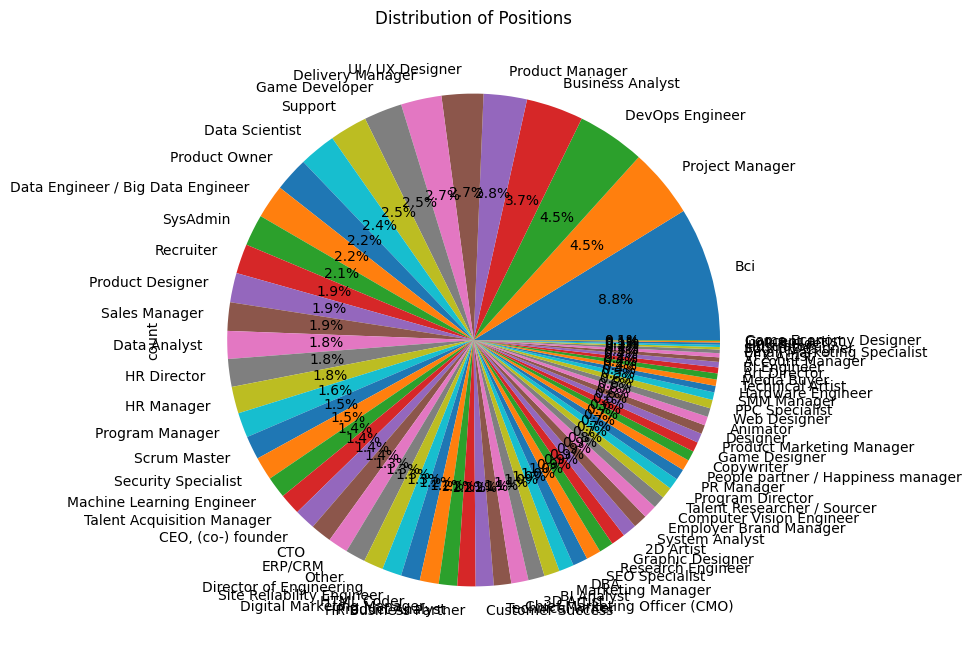

In [407]:
plt.figure(figsize=(8, 8))
salary_data['position'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Positions')
plt.show()

/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


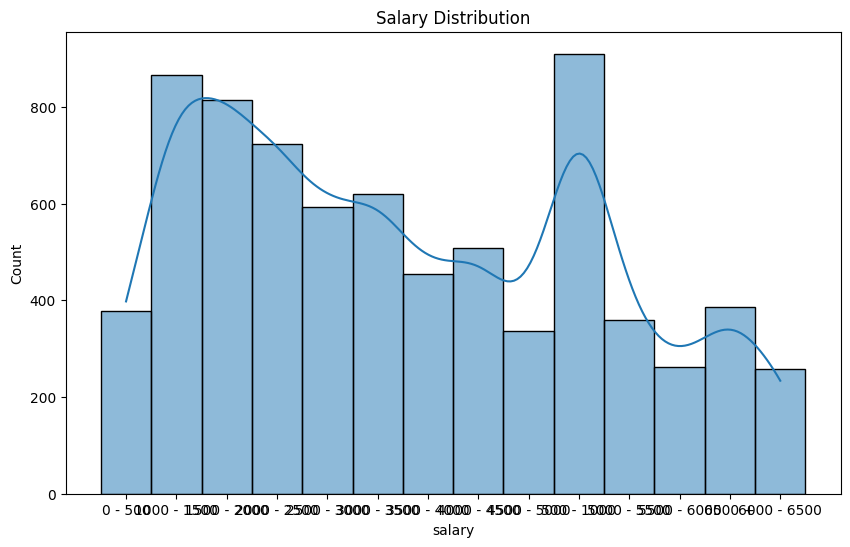

In [423]:
plt.figure(figsize=(10, 6))
sns.histplot(salary_data['salary'], bins=20, kde=True)
plt.title('Salary Distribution')
plt.show()

## Обробка та очищення даних

In [737]:
def del_value(data):
    # remove unnecessary values
    data = data[data['experience'] != 'Весь досвід']
    data = data[data['position'] != 'Всі']
    data = data[data['position'] != 'Other']

    # remove unnecessary columns
    data = data.drop(['freq'], axis=1)
    data = data.drop(['city'], axis=1)
    return data

In [701]:
salary_data_clean = del_value(salary_data)

In [739]:
# function for converting 'experience' to int
def extract_numeric(s):
    match = re.search(r'(\d+)-(\d+)', s)
    if match:
        return int(match.group(1))
    elif 'До року' in s:
        return 0
    elif 'років' in s:
        return int(re.search(r'\d+', s).group())
    return None


In [741]:
def encoding_data(df):
    # choose only the professions we need
    desired_job_titles = ['Data Scientist', 'Data Engineer / Big Data Engineer', 'Data Analyst', 'Computer Vision Engineer', 'Machine Learning Engineer']

    df = df[df['position'].isin(desired_job_titles)]

    # convert the value 6500+ to int
    replace_range_value = lambda x: '7000' if '6500 +' in x else int(x.split('-')[-1].strip())

    df['salary'] = df['salary'].apply(replace_range_value)
    df['salary'] = df['salary'].astype(int)

    # group the salary values and find the average and balance them
    df = df.groupby(['experience', 'position'])['salary'].mean().reset_index()
    df['salary'] = df['salary'].round(0).astype(int)     
    df['salary'] = df['salary'] - 500

    # duplicate to increase the number of examples
    df = pd.concat([df] * 2, ignore_index=True)
    df = df.sample(frac=1).reset_index(drop=True)

    # create ranges for experience
    df['experience'] = df['experience'].apply(extract_numeric)
    
    bins = [0, 1, 4, 7, 10, 15, float('inf')]
    labels = ['0', '1-3', '4-6', '7-10', '10-15', '15+']

    df['experience'] = pd.cut(df['experience'], bins=bins, labels=labels, right=False)

    # encode values in one-hot coding
    columns_for_encoding = ['experience', 'position']

    for column in columns_for_encoding:
        encoded_columns = pd.get_dummies(df[column], prefix=column)
        encoded_columns = encoded_columns.replace({False: 0, True: 1})
        df = pd.concat([df, encoded_columns], axis=1)
    
    df = df.drop(columns=columns_for_encoding)

    # save the created columns
    one_hot_columns = df.columns.tolist()
    one_hot_columns.remove('salary')
    joblib.dump(one_hot_columns, 'one_hot_columns.pkl')
        
    
    return df

In [729]:
salary_data_encod = encoding_data(salary_data_clean)

/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_66618/1753846331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].apply(replace_range_value)
/var/folders/y6/0v8f_ns90nnct7qv3jxpbx9r0000gn/T/ipykernel_66618/1753846331.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].astype(int)


In [727]:
salary_data_encod.head()

,salary,experience_0,experience_1-3,experience_4-6,experience_7-10,experience_10-15,experience_15+,position_Computer Vision Engineer,position_Data Analyst,position_Data Engineer / Big Data Engineer,position_Data Scientist,position_Machine Learning Engineer
0,4933,0,0,1,0,0,0,0,0,0,0,1
1,7000,0,0,0,1,0,0,1,0,0,0,0
2,3500,0,0,0,0,0,1,0,1,0,0,0
3,1583,1,0,0,0,0,0,0,0,1,0,0
4,5250,0,0,0,1,0,0,0,0,0,1,0


In [742]:
corr = salary_data_encod.corr()

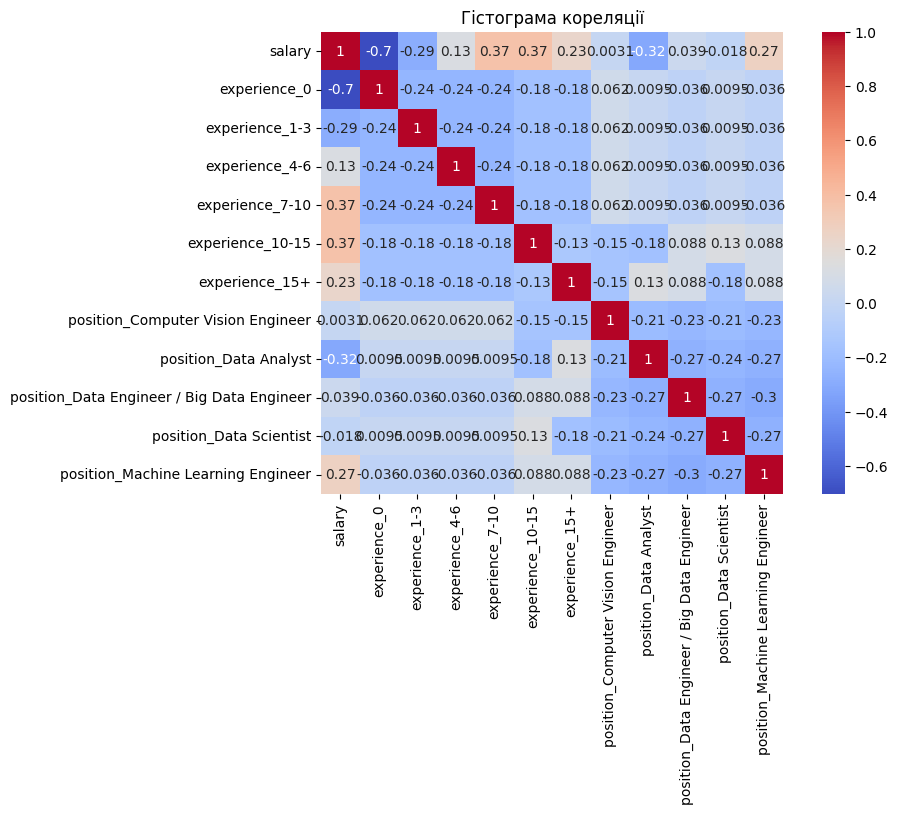

In [743]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Гістограма кореляції')
plt.show()

/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/admin/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


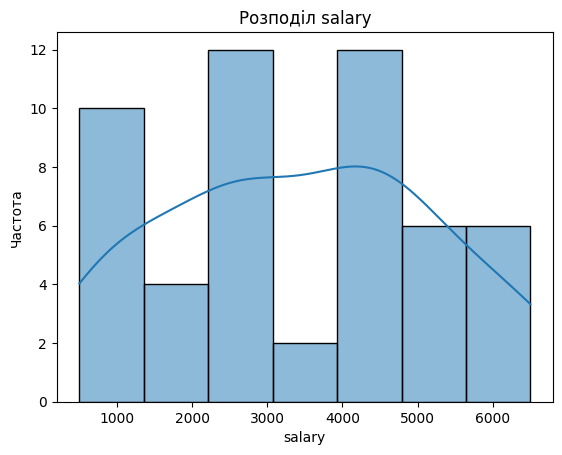

In [744]:
plt.figure()
sns.histplot(salary_data_encod['salary'], kde=True)
plt.xlabel('salary')
plt.ylabel("Частота")
plt.title(f"Розподіл {'salary'}")

plt.show()

## Підготовка та навчання моделей

In [730]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(salary_data_encod.drop(['salary'],axis=1))
y = salary_data_encod['salary'].values
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [731]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [749]:
# train various models on data
ML_Algo = {
    'randomforest' :RandomForestRegressor(),
    'knn' : KNeighborsRegressor(),
    'extratrees' : ExtraTreeRegressor(),
    'gb' : GradientBoostingRegressor(),
    'dt' : DecisionTreeRegressor(),
    'xgb' : XGBRegressor()
}

F_ML_Algo_res = {}

for name, model in ML_Algo.items():
    pred = model.fit(X_train, y_train).predict(X_test)
    F_ML_Algo_res[name] = r2_score(y_test, pred)

In [747]:
sorted_res = dict(sorted(F_ML_Algo_res.items(), key=lambda item: item[1], reverse=True))
pd.DataFrame({'Name': sorted_res.keys(), 'R-squarred': sorted_res.values()})

,Name,R-squarred
0,gb,0.994625
1,extratrees,0.988391
2,dt,0.988391
3,xgb,0.960944
4,randomforest,0.931140
5,knn,0.513950


## Improving models

In [734]:
rf = RandomForestRegressor(
    n_estimators=100,
    criterion='poisson',
    max_depth=10,
    random_state=50, 
)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
r2_score(y_test, pred)

0.9545189601958636

In [627]:
gb =GradientBoostingRegressor(learning_rate=0.01, n_estimators=600, subsample=0.9, max_depth=5, random_state=195)
pred = gb.fit(X_train, y_train).predict(X_test)
r2_score(y_test, pred)

0.9725444354163162

In [735]:
dt = DecisionTreeRegressor(max_depth=11)
y_pred = dt.fit(X_train, y_train).predict(X_test)
r2_score(y_test, y_pred)

0.9883905107965489

In [736]:
joblib.dump(dt, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [677]:
xgb = XGBRegressor(
    booster= 'gbtree',
    max_depth = 5,
    gamma  = 0.01,
    reg_alpha = 0.0098,
    objective ='reg:squarederror'
)
pred = xgb.fit(X_train, y_train).predict(X_test)
r2_score(y_test, pred)

0.9999999612452354

In [661]:
joblib.dump(dt, 'XGBRegressor_model.pkl')

['XGBRegressor_model.pkl']